In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_images(folder):
    images = []
    file_names = sorted(os.listdir(folder), key=lambda x: int(x.split('.')[0].split('(')[-1].split(')')[0]))
    for file in file_names:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder, file)
            image = cv2.imread(image_path)
            images.append((image, file))  # Store image and file name together
    return images


def plot_images(images1, images2, images3, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Process and save images in a sequential order
    for i, (image1, file1) in enumerate(images1, start=1):
        # Load images and corresponding file names
        image2, file2 = images2[i-1]
        image3, file3 = images3[i-1]

        # Increase the resolution of the images
        scale_factor = 8
        image1 = cv2.resize(image1, None, fx=scale_factor, fy=scale_factor)
        image2 = cv2.resize(image2, None, fx=scale_factor, fy=scale_factor)
        image3 = cv2.resize(image3, None, fx=scale_factor, fy=scale_factor)

        # Create a blank canvas to place the images side by side
        canvas_width = image1.shape[1] + image2.shape[1] + image3.shape[1]
        canvas_height = max(image1.shape[0], image2.shape[0], image3.shape[0] + 400)  # Add extra height for labeling
        canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

        # Place the images on the canvas
        canvas[:image1.shape[0], :image1.shape[1]] = image1
        canvas[:image2.shape[0], image1.shape[1]:image1.shape[1] + image2.shape[1]] = image2
        canvas[:image3.shape[0], image1.shape[1] + image2.shape[1]:] = image3

        # Add labels below the image sections
        label1 = 'HR_cell_segmented'
        label2 = 'Swin2SR_cell_segmented'
        label3 = 'ESRGAN_cell_segmented'
        text_height = max(image1.shape[0], image2.shape[0], image3.shape[0]) + 300  # Height of the text region

        # Determine the center position for each label
        label1_width = cv2.getTextSize(label1, cv2.FONT_HERSHEY_SIMPLEX, 1.5, -7)[0][0]
        label2_width = cv2.getTextSize(label2, cv2.FONT_HERSHEY_SIMPLEX, 1.5, -7)[0][0]
        label3_width = cv2.getTextSize(label3, cv2.FONT_HERSHEY_SIMPLEX, 1.5, -7)[0][0]

        # Adjust the x-coordinates for left positioning
        left_adjustment = 950 # Adjust this value as per your preference
        label1_x = (image1.shape[1] - label1_width) // 2 - left_adjustment
        label2_x = image1.shape[1] + (image2.shape[1] - label2_width) // 2 - left_adjustment
        label3_x = image1.shape[1] + image2.shape[1] + (image3.shape[1] - label3_width) // 2 - left_adjustment

        # Draw the labels on the canvas
        cv2.putText(canvas, label1, (label1_x, text_height), cv2.FONT_HERSHEY_SIMPLEX, 7.0, (255, 255, 255), 17, cv2.LINE_AA)
        cv2.putText(canvas, label2, (label2_x, text_height), cv2.FONT_HERSHEY_SIMPLEX, 7.0, (255, 255, 255), 17, cv2.LINE_AA)
        cv2.putText(canvas, label3, (label3_x, text_height), cv2.FONT_HERSHEY_SIMPLEX, 7.0, (255, 255, 255), 17, cv2.LINE_AA)

        # Save the resulting image with the same resolution
        output_path = os.path.join(output_folder, f'Cell_segmented_comparision_{i}.jpg')
        cv2.imwrite(output_path, canvas, [cv2.IMWRITE_JPEG_QUALITY, 100])

        # Display the image
        plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

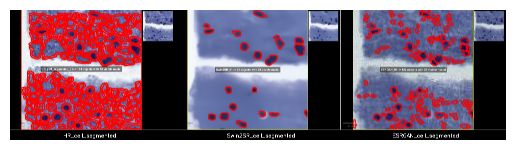

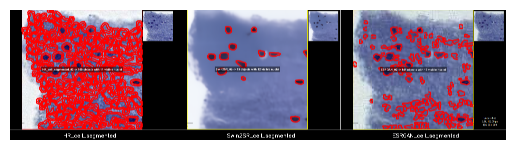

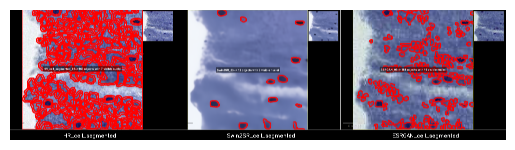

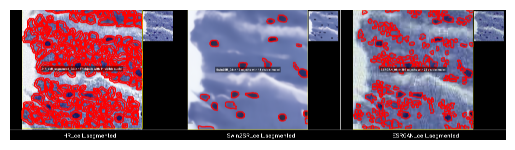

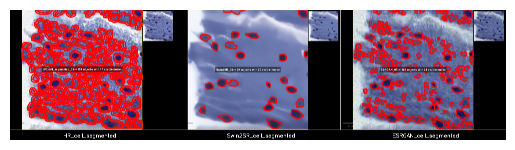

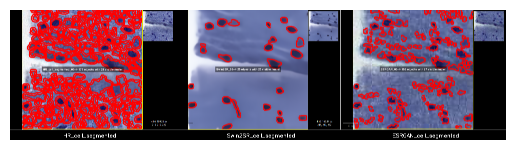

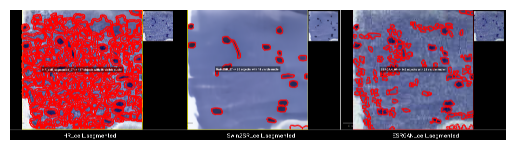

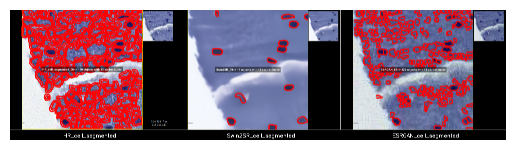

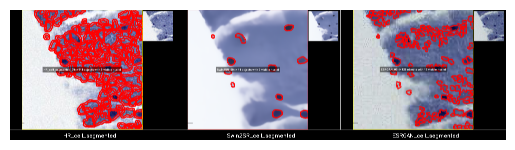

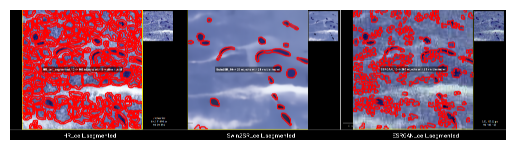

In [2]:
HR_cell_segmented = 'C:/Users/lifea/Downloads/SISR/Cell_segmented_comparision/HR_segmented_images'
Swin2SR_cell_segmented = 'C:/Users/lifea/Downloads/SISR/Cell_segmented_comparision/Reconstructed_Swin2SR_images'
ESRGAN_cell_segmented = 'C:/Users/lifea/Downloads/SISR/Cell_segmented_comparision/Reconstructed_ESRGAN_images'
Segmented_comparision = 'C:/Users/lifea/Downloads/SISR/Cell_segmented_comparision/Segmented_comparision'

# Load images from the folders
HR_cell_segmented_images = load_images(HR_cell_segmented)
Swin2SR_cell_segmented_images = load_images(Swin2SR_cell_segmented)
ESRGAN_cell_segmented_images = load_images(ESRGAN_cell_segmented)
plot_images(HR_cell_segmented_images, Swin2SR_cell_segmented_images, ESRGAN_cell_segmented_images, Segmented_comparision)